# Satish Agrawal
## Bellevue University
### DSC 630

In [67]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.metrics import mean_squared_error

#### Load the CSV file

In [68]:
# Read the CSV file
df_train = pd.read_csv("week7/train.csv", nrows=200000)

In [69]:
df_train.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


#### Review the target variable

In [70]:
df_train.hotel_cluster.describe()

count    200000.000000
mean         49.637945
std          28.985590
min           0.000000
25%          25.000000
50%          49.000000
75%          73.000000
max          99.000000
Name: hotel_cluster, dtype: float64

#### Split the dataset in train and test sets

I am using 85-15% split and setting aside 15% of all the data to help measure the performance of the model

In [185]:
X = df_train.drop(["date_time","user_id","srch_ci","srch_co","orig_destination_distance"], axis =1)

In [189]:
X_train, X_test = train_test_split(X, test_size=0.15, random_state=1)
print(len(X_train))
print(len(X_test))

170000
30000


### Exploratory data analysis on the train set

In [190]:
X.dtypes

site_name                   int64
posa_continent              int64
user_location_country       int64
user_location_region        int64
user_location_city          int64
is_mobile                   int64
is_package                  int64
channel                     int64
srch_adults_cnt             int64
srch_children_cnt           int64
srch_rm_cnt                 int64
srch_destination_id         int64
srch_destination_type_id    int64
is_booking                  int64
cnt                         int64
hotel_continent             int64
hotel_country               int64
hotel_market                int64
hotel_cluster               int64
dtype: object

In [191]:
X.head()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2,3,66,348,48862,0,1,9,2,0,1,8250,1,0,3,2,50,628,1
1,2,3,66,348,48862,0,1,9,2,0,1,8250,1,1,1,2,50,628,1
2,2,3,66,348,48862,0,0,9,2,0,1,8250,1,0,1,2,50,628,1
3,2,3,66,442,35390,0,0,3,2,0,1,14984,1,0,1,2,50,1457,80
4,2,3,66,442,35390,0,0,3,2,0,1,14984,1,0,1,2,50,1457,21


In [192]:
X.isnull().sum()

site_name                   0
posa_continent              0
user_location_country       0
user_location_region        0
user_location_city          0
is_mobile                   0
is_package                  0
channel                     0
srch_adults_cnt             0
srch_children_cnt           0
srch_rm_cnt                 0
srch_destination_id         0
srch_destination_type_id    0
is_booking                  0
cnt                         0
hotel_continent             0
hotel_country               0
hotel_market                0
hotel_cluster               0
dtype: int64

In [193]:
X_train

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
71482,2,3,198,208,54488,0,0,1,2,0,1,21787,6,0,3,6,105,29,14
96292,37,1,69,712,38761,1,1,9,2,0,1,792,1,0,1,6,208,1480,64
134682,2,3,66,174,20857,0,0,2,2,0,1,7916,3,0,1,2,50,970,57
53243,2,3,66,363,478,0,0,0,2,0,1,19776,6,0,1,2,50,212,84
86971,2,3,66,348,47997,0,0,1,2,2,1,8745,1,0,1,6,204,27,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73349,37,1,69,1010,15905,0,0,7,2,0,1,18822,6,0,1,6,204,1760,5
109259,2,3,66,442,23258,0,0,2,8,0,2,8745,1,1,1,6,204,27,25
50057,2,3,66,318,33796,0,0,0,2,4,1,11986,1,0,1,2,50,463,42
5192,2,3,66,174,18354,0,0,2,2,1,1,24691,6,0,1,2,50,1241,18


### Hotel cluster - the target variable

In [194]:
X_train.hotel_cluster.describe()

count    170000.000000
mean         49.636835
std          28.985264
min           0.000000
25%          25.000000
50%          49.000000
75%          73.000000
max          99.000000
Name: hotel_cluster, dtype: float64

C:\applications\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hotel_cluster', ylabel='count'>

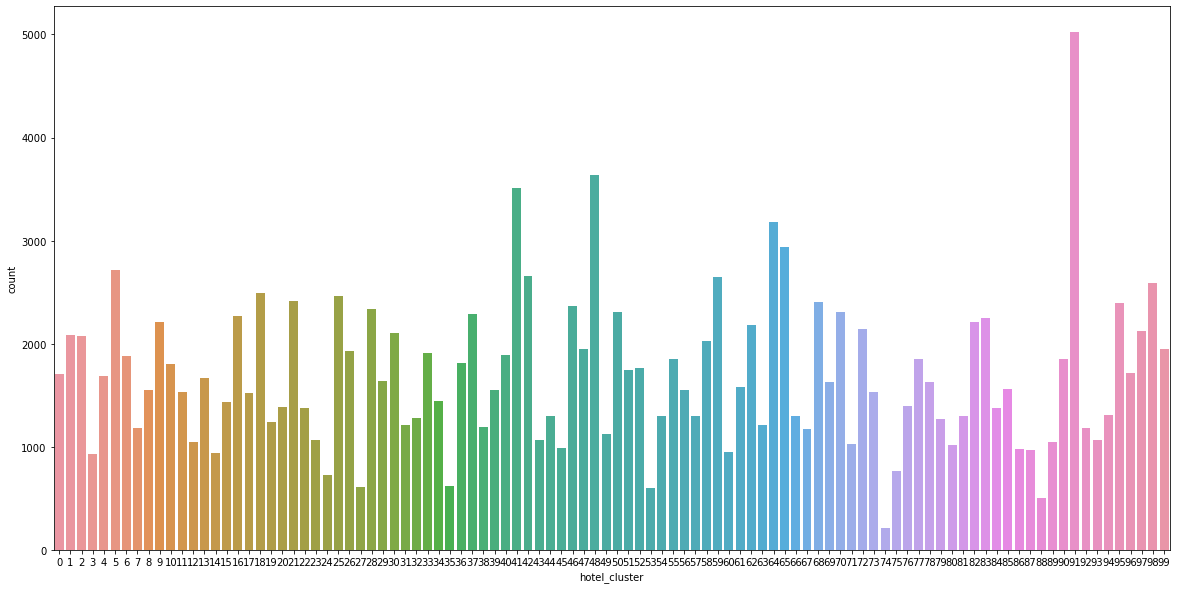

In [195]:
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot()
sns.countplot(X_train.hotel_cluster, ax=ax)

Hotel cluster values are ranging from 0 to 99. All the quartiles are right at the quarter of the value. Like 25% is 25, 50% is at 49 and 75% is at 73. Looking at the graphThere is no huge class imbalance to treat it for. It is a classification problem with 100 classes. 

In [79]:
# Imputation using mean
#impute_mean = SimpleImputer(missing_values= np.nan, strategy='mean',copy = True, verbose= 2)
#X_imputed = pd.DataFrame(impute_mean.fit_transform(X_train),columns=X_train.columns)

In [196]:
#X_imputed.isnull().sum()

#### Correlation matrix

In [197]:
corrMatrix = X_train.corr()

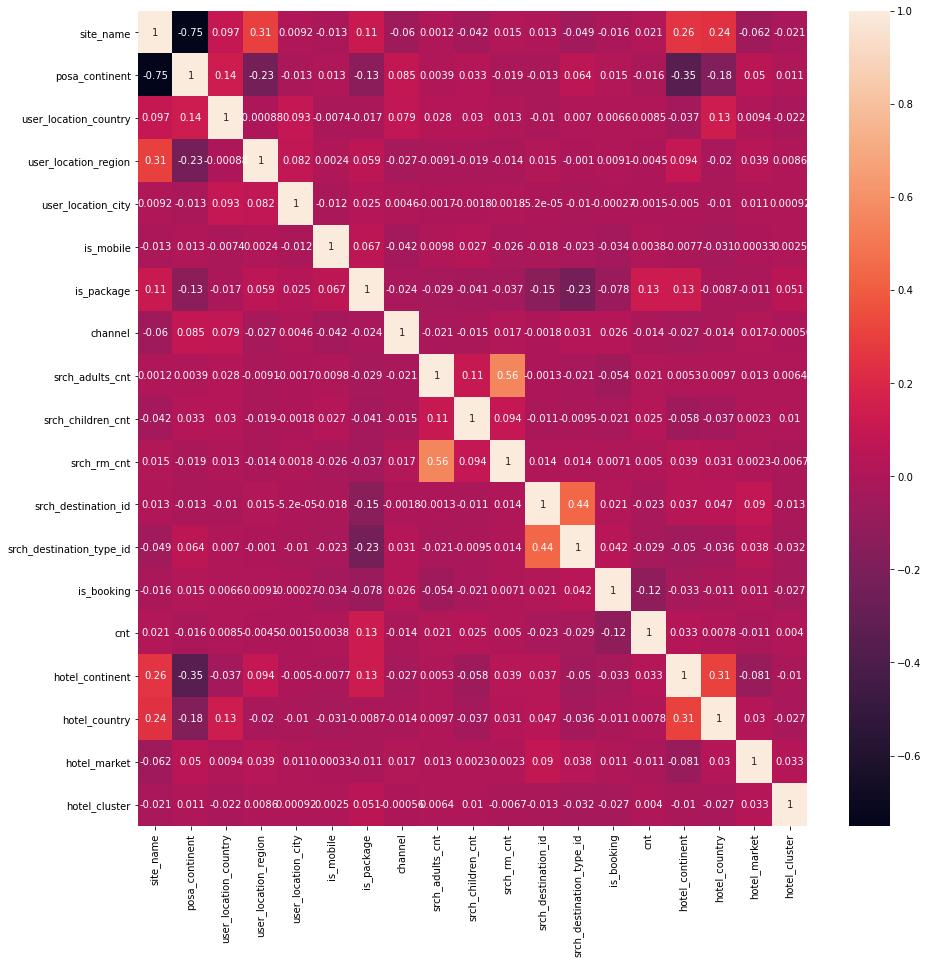

In [198]:
plt.subplots(figsize=(15,15))
sns.heatmap(corrMatrix, annot=True)
plt.show()

Looking at the correlation matrix, I can see that these attributes do not have direst strong correlation wit hthe hotel_cluster selection. It is possible that none of these attributes individually help deciding the value for hotel cluter but it is also possible that the combination of tow or more variable has strong correlation with the target variable. I will look at each one of these attributes and review their distributions, remove any outliers

### posa continent

In [153]:
X_train.posa_continent.describe()

count    170000.000000
mean          2.656565
std           0.753265
min           0.000000
25%           3.000000
50%           3.000000
75%           3.000000
max           4.000000
Name: posa_continent, dtype: float64

C:\applications\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='posa_continent', ylabel='count'>

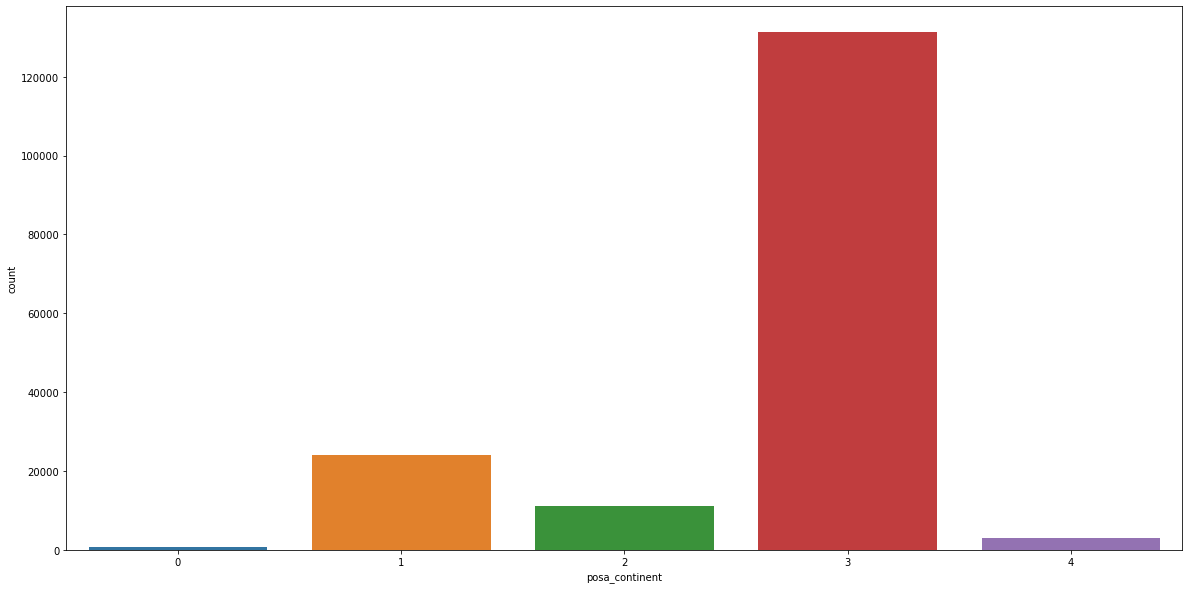

In [146]:
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot()
sns.countplot(X_train['posa_continent'], ax=ax)

posa continent values vary between 0 and 5. Most frequent vale is 3 and the mean is 2.656565. This is not a normal distribution but is acceptable for this case study. 

#### Search children count

In [154]:
X_train.srch_children_cnt.describe()

count    170000.000000
mean          0.327682
std           0.722987
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: srch_children_cnt, dtype: float64

C:\applications\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='srch_children_cnt', ylabel='count'>

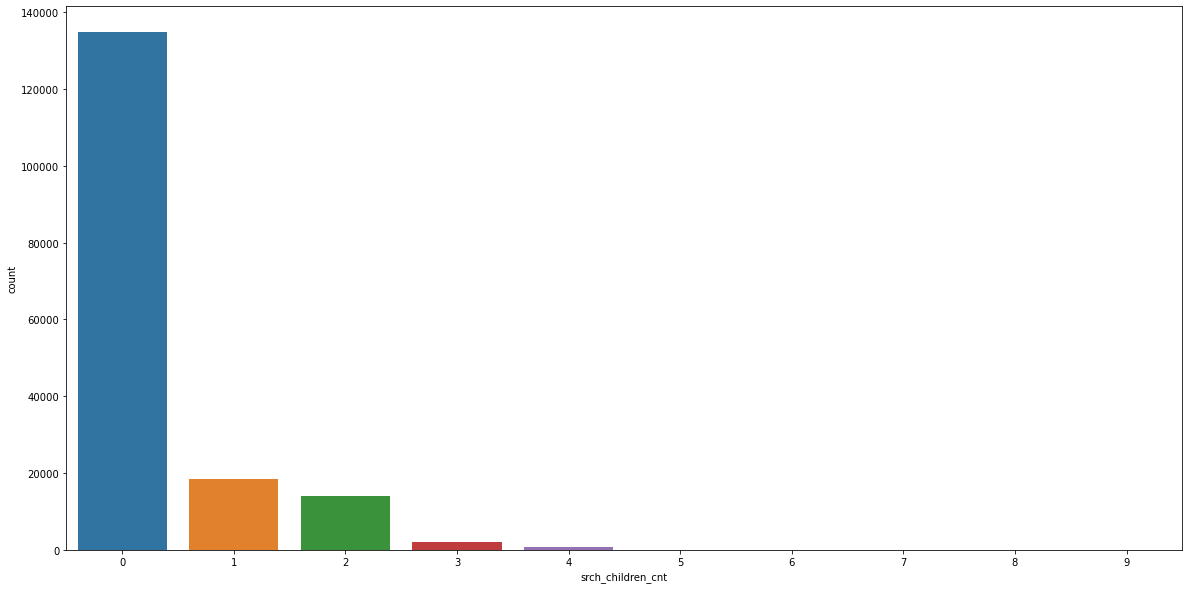

In [147]:
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot()
sns.countplot(X_train.srch_children_cnt, ax=ax)

Search children count ranges from 0 to 9. Most of the cases has 0 children in the search. there are very few observations where children count was more than 4. It be a better set if outliers above 4 are dropped.

In [199]:
X_train = X_train[X_train['srch_children_cnt'] < 5]

C:\applications\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='srch_children_cnt', ylabel='count'>

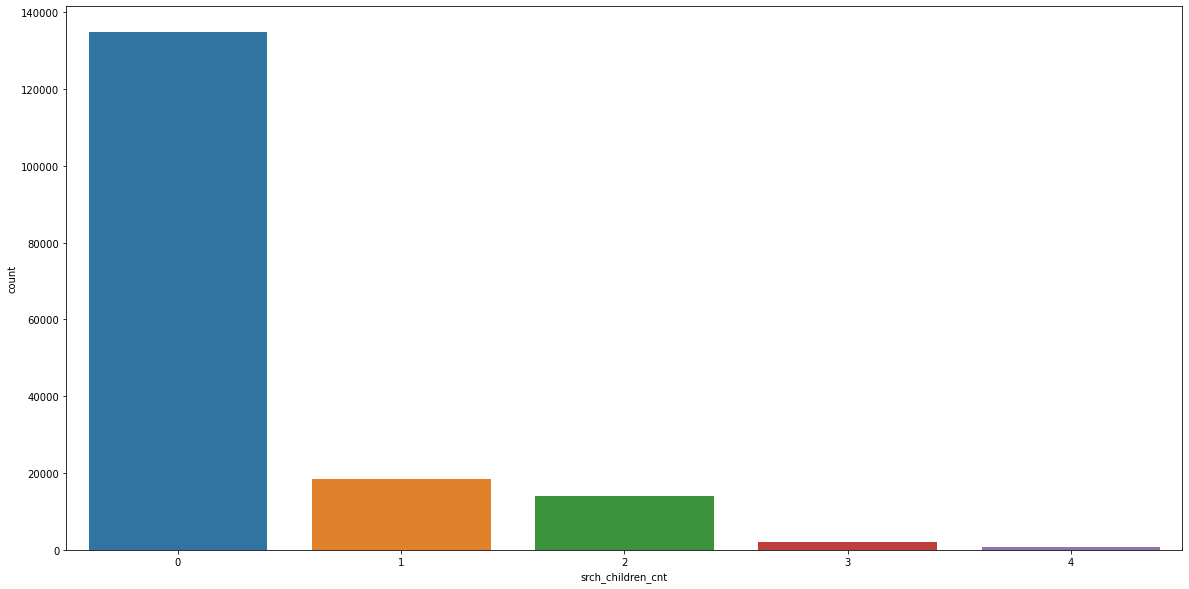

In [200]:
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot()
sns.countplot(X_train.srch_children_cnt, ax=ax)

### Is Mobile

In [201]:
X_train.is_mobile.describe()

count    169880.000000
mean          0.135596
std           0.342360
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: is_mobile, dtype: float64

C:\applications\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_mobile', ylabel='count'>

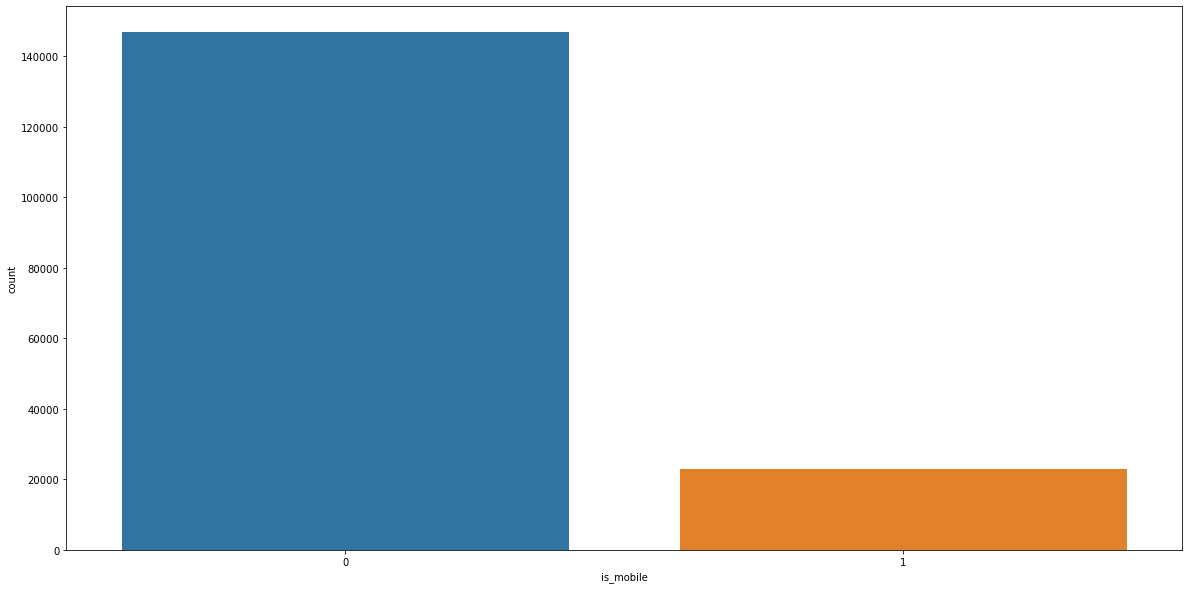

In [202]:
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot()
sns.countplot(X_train.is_mobile, ax=ax)

#### Search room count

In [203]:
X_train.srch_rm_cnt.describe()

count    169880.000000
mean          1.115170
std           0.450426
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           8.000000
Name: srch_rm_cnt, dtype: float64

Is mobile has only values 0 and 1. It has no missing values or any outliers. 

C:\applications\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='srch_rm_cnt', ylabel='count'>

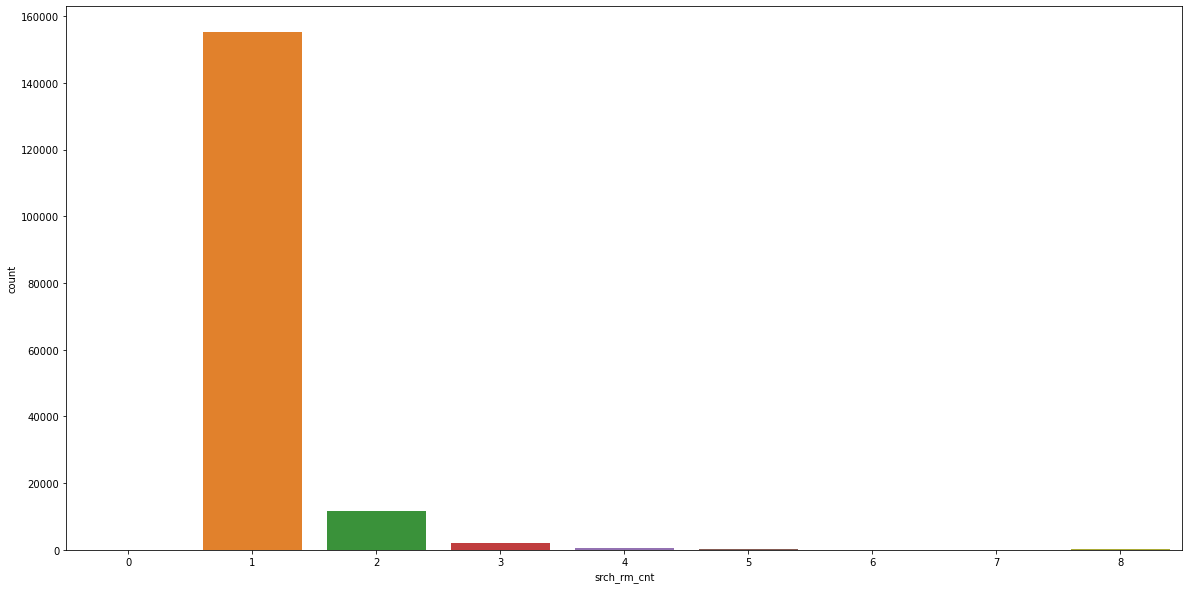

In [204]:
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot()
sns.countplot(X_train.srch_rm_cnt, ax=ax)

The value for room count ranges from 1 to 8. The most of the searches are for one room. Which is the most common search in hotel booking. Given that there are very less number of records for room count 2 and more, I would drop the 3 and above room count search to avoid any overfitting.

In [205]:
X_train = X_train[X_train['srch_rm_cnt'] < 3]
X_train = X_train[X_train['srch_rm_cnt'] > 0]

C:\applications\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='srch_rm_cnt', ylabel='count'>

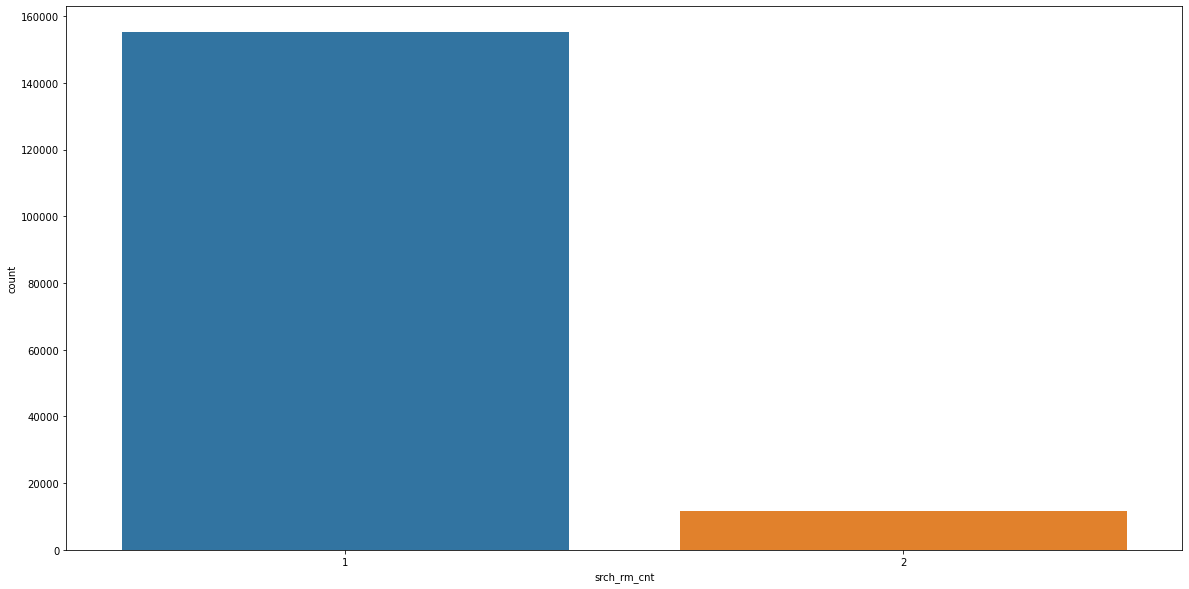

In [206]:
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot()
sns.countplot(X_train.srch_rm_cnt, ax=ax)

### count

In [207]:
X_train.cnt.describe()

count    166879.000000
mean          1.479180
std           1.199968
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          59.000000
Name: cnt, dtype: float64

C:\applications\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cnt', ylabel='count'>

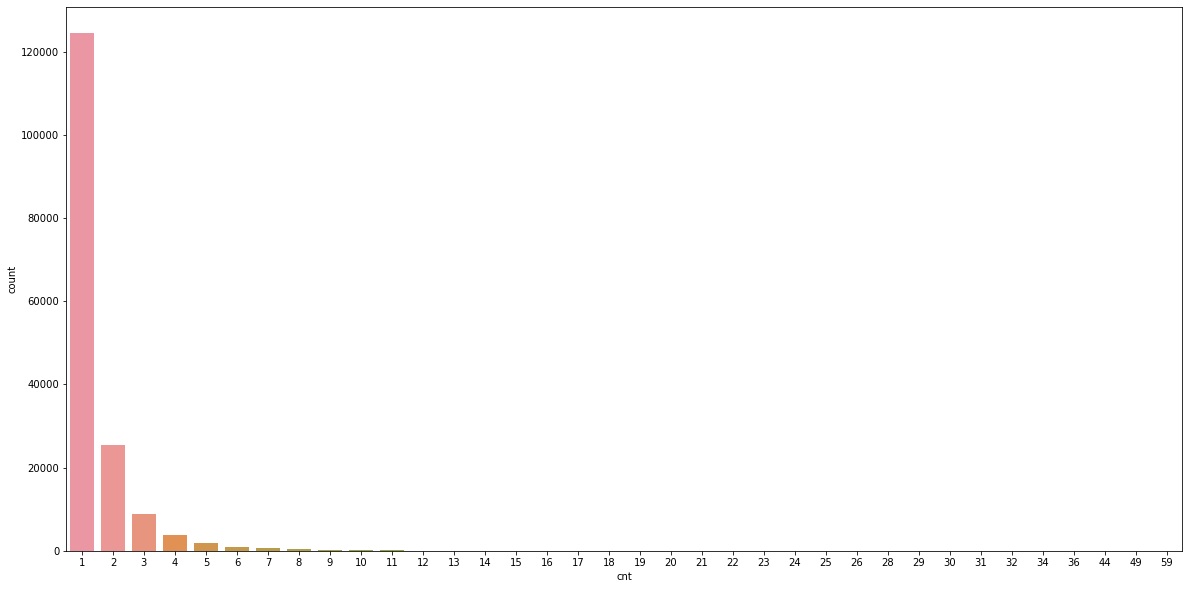

In [208]:
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot()
sns.countplot(X_train.cnt, ax=ax)

Highly skewed observations for the attribute count. Most of the records has the value of 1. The value for the column varies between 1 and 59 but there are very few records with higher values. I will drop anything above the value of 11

In [209]:
X_train = X_train[X_train['cnt'] <12]

C:\applications\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cnt', ylabel='count'>

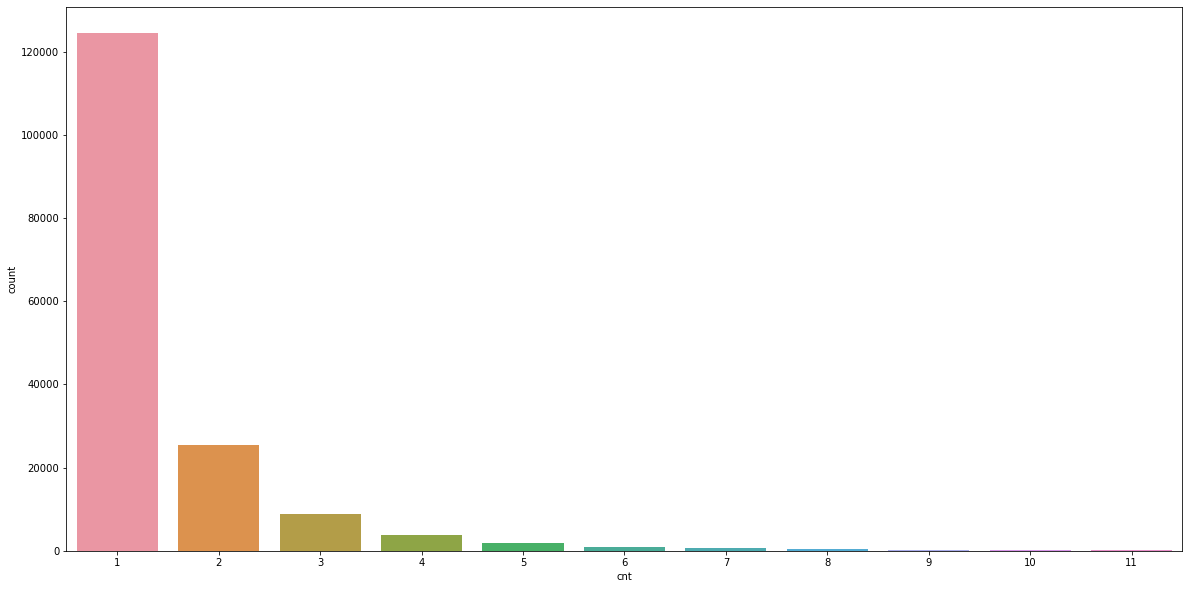

In [210]:
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot()
sns.countplot(X_train.cnt, ax=ax)

In [213]:
Y_train = X_train.hotel_cluster
X_train2 = X_train.drop('hotel_cluster', axis=1)

Y_test = X_test.hotel_cluster
X_test2 = X_test.drop('hotel_cluster', axis=1)

In [214]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()
knn.fit(X_train2,Y_train)
y_predict = knn.predict(X_test2)

In [215]:
acc=accuracy_score(Y_test,y_predict)

In [216]:
acc

0.20923333333333333

Accuracy with the KNeighborsClassifier model is coming down to 20.9% percent which is very low. Lets try to train logistics regression with the same dataset and see how it performs.

In [221]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
params = {'C' : [10**-4,10**-2,10**1,10**3],
          'penalty': ['l1', 'l2']#,'class_weight': [{0: x, 1: 1.0-x} for x in weights]
         }
clf = LogisticRegression(n_jobs= -1,random_state=42)
clf.fit(X_train2,Y_train)
model = GridSearchCV(estimator=clf,cv = 2,n_jobs= -1,param_grid=params,scoring='accuracy',verbose= 2)
model.fit(X_train2,Y_train)
print("Best estimator is", model.best_params_)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  16 | elapsed:    2.2s remaining:   16.2s
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed:  1.3min remaining:   36.4s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  1.4min finished


Best estimator is {'C': 0.01, 'penalty': 'l2'}


In [223]:
y_pred = clf.predict(X_test2)

In [225]:
acc=accuracy_score(Y_test,y_pred)

In [226]:
acc

0.03283333333333333

Logistics modle withthe best parameters is performing very poorly.

In [235]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=80)
clf.fit(X_train2, Y_train)
y_pred=clf.predict(X_test2)
acc=accuracy_score(Y_test,y_pred)

In [236]:
acc

0.27373333333333333

Accuracy came to 27%. Looking at destination csv to see if that has more data tha correlates with the target variable and gives a better model

#### looking at the destination.csv file

In [106]:
# Read the CSV file
df_destinations = pd.read_csv("week7/destinations.csv")

In [107]:
df_destinations

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,0,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-1.897627,...,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657
1,1,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.165028,-2.181690,-2.181690,-2.031597,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
2,2,-2.183490,-2.224164,-2.224164,-2.189562,-2.105819,-2.075407,-2.224164,-2.118483,-2.140393,...,-2.224164,-2.224164,-2.196379,-2.224164,-2.192009,-2.224164,-2.224164,-2.224164,-2.224164,-2.057548
3,3,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.115485,-2.177409,-2.177409,-2.177409,...,-2.161081,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409
4,4,-2.189562,-2.187783,-2.194008,-2.171153,-2.152303,-2.056618,-2.194008,-2.194008,-2.145911,...,-2.187356,-2.194008,-2.191779,-2.194008,-2.194008,-2.185161,-2.194008,-2.194008,-2.194008,-2.188037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62101,64989,-2.145876,-2.158016,-2.216621,-2.158016,-2.006209,-2.102505,-2.216621,-2.157203,-2.216621,...,-2.216621,-2.158016,-2.158016,-2.216621,-2.216621,-2.216621,-2.216621,-2.216621,-2.216621,-2.152024
62102,64990,-2.203479,-2.203479,-2.203479,-2.203479,-2.203479,-2.176802,-2.203479,-2.203479,-2.203479,...,-2.203479,-2.203479,-2.203479,-2.203479,-2.203479,-2.203479,-2.203479,-2.203479,-2.203479,-2.008885
62103,64991,-2.190567,-2.208308,-2.208308,-2.208308,-2.208308,-2.135493,-2.208308,-2.208308,-1.909808,...,-2.188935,-2.208308,-2.175594,-2.208308,-2.208308,-2.199347,-2.208308,-2.208308,-2.208308,-2.208308
62104,64992,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,...,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686,-2.173686


In [227]:
df_train_dest = pd.merge(X_train, df_destinations, how='left',on ='srch_destination_id')

In [228]:
df_train_dest

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,2,3,198,208,54488,0,0,1,2,0,...,-2.228588,-2.228587,-2.228588,-2.228588,-2.228588,-2.228588,-2.177808,-2.228588,-2.228588,-2.228588
1,37,1,69,712,38761,1,1,9,2,0,...,-2.221950,-2.253474,-2.224931,-2.253258,-2.253474,-2.227218,-2.018787,-2.253474,-2.253474,-2.253474
2,2,3,66,174,20857,0,0,2,2,0,...,-2.188128,-2.188128,-2.188128,-2.188128,-2.188128,-2.188128,-2.188128,-2.188128,-2.188128,-2.188128
3,2,3,66,363,478,0,0,0,2,0,...,-2.307724,-2.227557,-2.302486,-2.228870,-2.295820,-2.304942,-2.336578,-2.324809,-2.336578,-1.943764
4,2,3,66,348,47997,0,0,1,2,2,...,-2.261514,-2.103032,-2.261378,-2.261854,-2.261854,-2.261627,-2.261854,-2.261854,-2.261854,-2.249091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166653,37,1,69,1010,15905,0,0,7,2,0,...,-2.201380,-2.201380,-2.201380,-2.201380,-2.201380,-2.201380,-1.884058,-2.201380,-2.201380,-2.201380
166654,2,3,66,442,23258,0,0,2,8,0,...,-2.261514,-2.103032,-2.261378,-2.261854,-2.261854,-2.261627,-2.261854,-2.261854,-2.261854,-2.249091
166655,2,3,66,318,33796,0,0,0,2,4,...,-2.232030,-2.193551,-2.233646,-2.233646,-2.233646,-2.233646,-2.233646,-2.233646,-2.233646,-2.233646
166656,2,3,66,174,18354,0,0,2,2,1,...,-2.212742,-2.178361,-2.212742,-2.212742,-2.212742,-2.212742,-2.212742,-2.212742,-2.212742,-2.212742


In [229]:
df_train_dest.isnull().sum()

site_name                   0
posa_continent              0
user_location_country       0
user_location_region        0
user_location_city          0
                         ... 
d145                     1060
d146                     1060
d147                     1060
d148                     1060
d149                     1060
Length: 168, dtype: int64

In [230]:
df_train_dest.dropna()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,2,3,198,208,54488,0,0,1,2,0,...,-2.228588,-2.228587,-2.228588,-2.228588,-2.228588,-2.228588,-2.177808,-2.228588,-2.228588,-2.228588
1,37,1,69,712,38761,1,1,9,2,0,...,-2.221950,-2.253474,-2.224931,-2.253258,-2.253474,-2.227218,-2.018787,-2.253474,-2.253474,-2.253474
2,2,3,66,174,20857,0,0,2,2,0,...,-2.188128,-2.188128,-2.188128,-2.188128,-2.188128,-2.188128,-2.188128,-2.188128,-2.188128,-2.188128
3,2,3,66,363,478,0,0,0,2,0,...,-2.307724,-2.227557,-2.302486,-2.228870,-2.295820,-2.304942,-2.336578,-2.324809,-2.336578,-1.943764
4,2,3,66,348,47997,0,0,1,2,2,...,-2.261514,-2.103032,-2.261378,-2.261854,-2.261854,-2.261627,-2.261854,-2.261854,-2.261854,-2.249091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166653,37,1,69,1010,15905,0,0,7,2,0,...,-2.201380,-2.201380,-2.201380,-2.201380,-2.201380,-2.201380,-1.884058,-2.201380,-2.201380,-2.201380
166654,2,3,66,442,23258,0,0,2,8,0,...,-2.261514,-2.103032,-2.261378,-2.261854,-2.261854,-2.261627,-2.261854,-2.261854,-2.261854,-2.249091
166655,2,3,66,318,33796,0,0,0,2,4,...,-2.232030,-2.193551,-2.233646,-2.233646,-2.233646,-2.233646,-2.233646,-2.233646,-2.233646,-2.233646
166656,2,3,66,174,18354,0,0,2,2,1,...,-2.212742,-2.178361,-2.212742,-2.212742,-2.212742,-2.212742,-2.212742,-2.212742,-2.212742,-2.212742


In [247]:
df_train_dest.describe()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
count,166658.000000,166658.000000,166658.000000,166658.000000,166658.000000,166658.000000,166658.000000,166658.000000,166658.000000,166658.000000,...,165598.000000,165598.000000,165598.000000,165598.000000,165598.000000,165598.000000,165598.000000,165598.000000,165598.000000,165598.000000
mean,8.895091,2.657634,85.211865,316.267092,27965.300250,0.136573,0.257155,5.809010,1.985737,0.321779,...,-2.259629,-2.231819,-2.249893,-2.254223,-2.248468,-2.257878,-2.261393,-2.267529,-2.265849,-2.239985
std,11.911857,0.752327,54.272257,209.440158,16783.929402,0.343397,0.437067,3.758695,0.789417,0.701930,...,0.049067,0.107628,0.068962,0.063497,0.060984,0.049825,0.068864,0.050844,0.053186,0.070691
min,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-2.408391,-2.404047,-2.408391,-2.399953,-2.408391,-2.399389,-2.406669,-2.400757,-2.408391,-2.408391
25%,2.000000,3.000000,66.000000,174.000000,13476.000000,0.000000,0.000000,2.000000,2.000000,0.000000,...,-2.283477,-2.274158,-2.286259,-2.285893,-2.278939,-2.283220,-2.294888,-2.293753,-2.294888,-2.276540
50%,2.000000,3.000000,66.000000,314.000000,27655.000000,0.000000,0.000000,9.000000,2.000000,0.000000,...,-2.253602,-2.240484,-2.251408,-2.249610,-2.242472,-2.250758,-2.258193,-2.261854,-2.260835,-2.240952
75%,11.000000,3.000000,69.000000,395.000000,42899.000000,0.000000,1.000000,9.000000,2.000000,0.000000,...,-2.225110,-2.207490,-2.216861,-2.219905,-2.211198,-2.225044,-2.225993,-2.232612,-2.230930,-2.206661
max,53.000000,4.000000,239.000000,1025.000000,56498.000000,1.000000,1.000000,10.000000,9.000000,4.000000,...,-2.081318,-0.997382,-1.363434,-1.810671,-1.935139,-2.012649,-1.463392,-1.939302,-1.945084,-1.814839


In [244]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_scaled = sc.fit_transform(df_train_dest) 

In [245]:
Y_train_dest = df_scaled.hotel_cluster
X_train_dest = df_scaled.drop('hotel_cluster', axis=1)

AttributeError: 'numpy.ndarray' object has no attribute 'hotel_cluster'

In [237]:
clf = RandomForestClassifier(n_estimators=80)
clf.fit(X_train_dest, Y_train_dest)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
y_pred=clf.predict(X_test2)
acc=accuracy_score(Y_test,y_pred)